In [ ]:
#Step 1: Import the California Test Score Dataset

In [ ]:
# Import necessary libraries
import pandas as pd

# Load the dataset from the provided URL
url = "https://vincentarelbundock.github.io/Rdatasets/csv/Ecdat/Caschool.csv"
data = pd.read_csv(url)

# Display the first few rows of the dataset to understand its structure
data.head()


,rownames,distcod,county,district,grspan,enrltot,teachers,calwpct,mealpct,computer,testscr,compstu,expnstu,str,avginc,elpct,readscr,mathscr
0,1,75119,Alameda,Sunol Glen Unified,KK-08,195,10.900000,0.510200,2.040800,67,690.799988,0.343590,6384.911133,17.889910,22.690001,0.000000,691.599976,690.000000
1,2,61499,Butte,Manzanita Elementary,KK-08,240,11.150000,15.416700,47.916698,101,661.200012,0.420833,5099.380859,21.524664,9.824000,4.583333,660.500000,661.900024
2,3,61549,Butte,Thermalito Union Elementary,KK-08,1550,82.900002,55.032299,76.322601,169,643.599976,0.109032,5501.954590,18.697226,8.978000,30.000002,636.299988,650.900024
3,4,61457,Butte,Golden Feather Union Elementary,KK-08,243,14.000000,36.475399,77.049202,85,647.700012,0.349794,7101.831055,17.357143,8.978000,0.000000,651.900024,643.500000
4,5,61523,Butte,Palermo Union Elementary,KK-08,1335,71.500000,33.108601,78.427002,171,640.849976,0.128090,5235.987793,18.671329,9.080333,13.857677,641.799988,639.900024


In [ ]:
  #Step 2: Visualize the Univariate Distribution of the Target Feature and Continuous Explanatory Variables

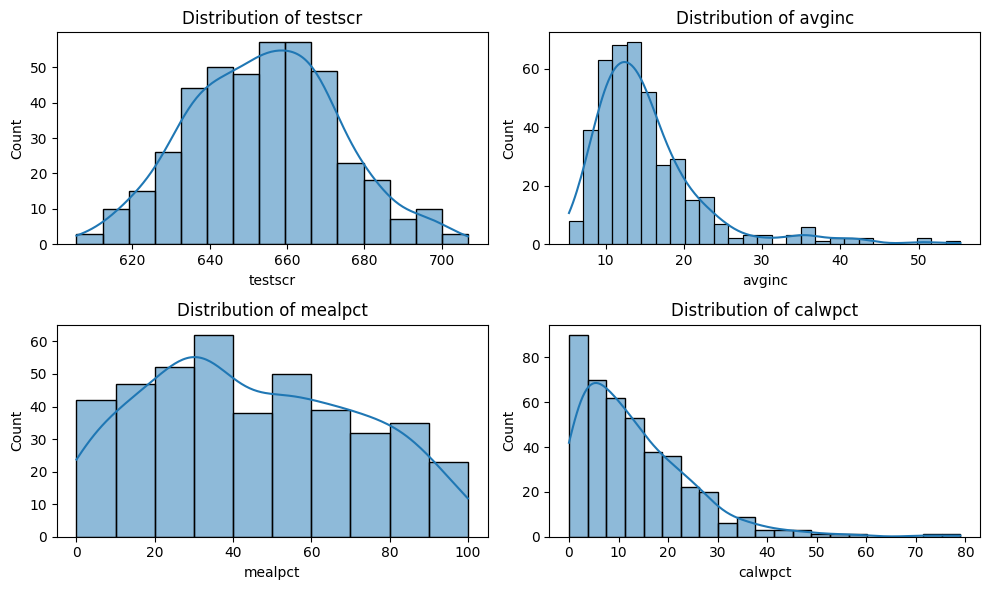

In [ ]:
# Import necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Select target variable and three continuous explanatory variables
features = ['testscr', 'avginc', 'mealpct', 'calwpct']

# Plot univariate distributions for each feature
plt.figure(figsize=(10, 6))
for i, feature in enumerate(features):
    plt.subplot(2, 2, i+1)
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()


In [ ]:
#Step 3: Visualize the Dependency of the Target on Each Featur

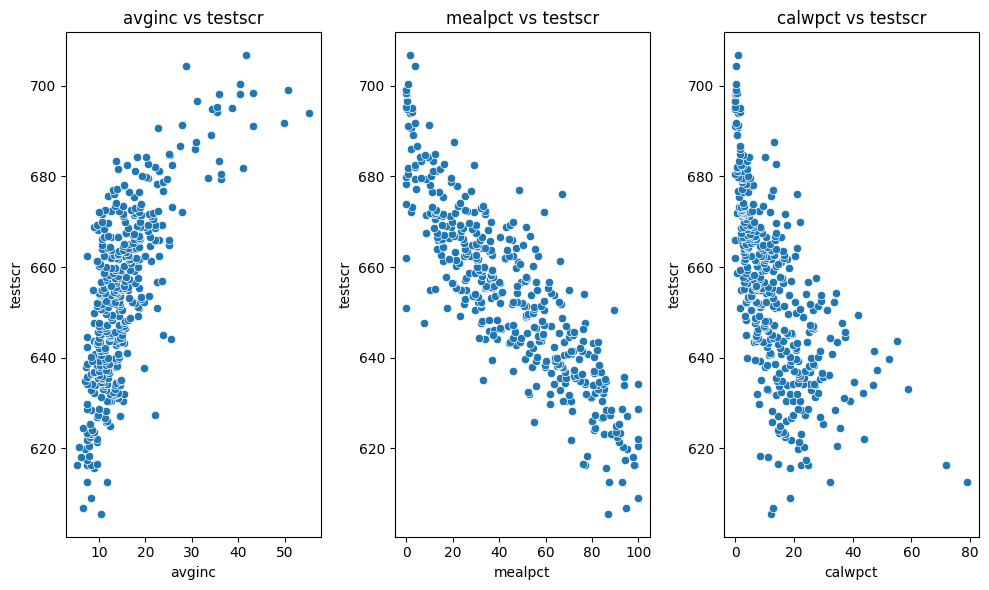

In [ ]:
# Plot scatter plots to show the dependency between target and selected features
plt.figure(figsize=(10, 6))
for i, feature in enumerate(features[1:]):  # Exclude 'testscr' itself
    plt.subplot(1, 3, i+1)
    sns.scatterplot(x=data[feature], y=data['testscr'])
    plt.title(f'{feature} vs testscr')
plt.tight_layout()
plt.show()


In [ ]:
#Step 4: Splitting the Data into Training and Test Sets and Building Models

In [ ]:
# Drop the non-numeric columns, including 'grspan'
X = data.drop(columns=['testscr', 'readscr', 'mathscr', 'distcod', 'county', 'district', 'grspan'])

# Check the data types to ensure only numeric columns are left
print(X.dtypes)

# Now split the data into training and test sets again
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the models again
knn = KNeighborsRegressor()
linear_reg = LinearRegression()
ridge = Ridge()
lasso = Lasso()

# Cross-validation evaluation for each model
models = {'KNN': knn, 'Linear Regression': linear_reg, 'Ridge': ridge, 'Lasso': lasso}

# Evaluate each model using cross-validation
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5)
    print(f"{name}: Mean CV Score = {scores.mean():.4f}")


rownames      int64
enrltot       int64
teachers    float64
calwpct     float64
mealpct     float64
computer      int64
compstu     float64
expnstu     float64
str         float64
avginc      float64
elpct       float64
dtype: object
KNN: Mean CV Score = 0.3486
Linear Regression: Mean CV Score = 0.9247
Ridge: Mean CV Score = 0.9255
Lasso: Mean CV Score = 0.9256


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.857e+01, tolerance: 9.099e+00
  model = cd_fast.enet_coordinate_descent(


In [ ]:
#Step 5: Running Models with and Without StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler

# Apply StandardScaler to the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Evaluate models with scaled data
for name, model in models.items():
    scores_scaled = cross_val_score(model, X_train_scaled, y_train, cv=5)
    print(f"{name} with StandardScaler: Mean CV Score = {scores_scaled.mean():.4f}")


KNN with StandardScaler: Mean CV Score = 0.8557
Linear Regression with StandardScaler: Mean CV Score = 0.9247
Ridge with StandardScaler: Mean CV Score = 0.9252
Lasso with StandardScaler: Mean CV Score = 0.9234


In [ ]:
#Step 6: Tune Parameters Using GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grids for tuning
param_grid_knn = {'n_neighbors': [3, 5, 7, 9]}
param_grid_ridge = {'alpha': [0.1, 1, 10, 100]}
param_grid_lasso = {'alpha': [0.1, 1, 10, 100]}

# Perform GridSearchCV for each model
grid_knn = GridSearchCV(KNeighborsRegressor(), param_grid_knn, cv=5)
grid_ridge = GridSearchCV(Ridge(), param_grid_ridge, cv=5)
grid_lasso = GridSearchCV(Lasso(), param_grid_lasso, cv=5)

# Fit the models using GridSearchCV
grid_knn.fit(X_train_scaled, y_train)
grid_ridge.fit(X_train_scaled, y_train)
grid_lasso.fit(X_train_scaled, y_train)

# Print the best parameters for each model
print(f"KNN: Best Parameters = {grid_knn.best_params_}")
print(f"Ridge: Best Parameters = {grid_ridge.best_params_}")
print(f"Lasso: Best Parameters = {grid_lasso.best_params_}")


KNN: Best Parameters = {'n_neighbors': 5}
Ridge: Best Parameters = {'alpha': 10}
Lasso: Best Parameters = {'alpha': 0.1}


In [ ]:
#Step 7: Compare Coefficients of Two Best Linear Models (Ridge and Lasso)

In [ ]:
# Fit Ridge and Lasso on the scaled training data
ridge_best = grid_ridge.best_estimator_
lasso_best = grid_lasso.best_estimator_

# Fit the models
ridge_best.fit(X_train_scaled, y_train)
lasso_best.fit(X_train_scaled, y_train)

# Compare coefficients
print("Ridge Regression Coefficients:", ridge_best.coef_)
print("Lasso Regression Coefficients:", lasso_best.coef_)


Ridge Regression Coefficients: [12.53835445  0.42942629  0.23452052  0.64435961 -2.93225889 -0.35405716
  0.66459617  0.26239234 -0.44055845  2.1756855  -1.44499997]
Lasso Regression Coefficients: [13.74781771  0.19824274  0.          0.63763827 -2.12288971  0.
  0.6020069   0.18792993 -0.30126117  2.03622291 -1.20129284]


In [ ]:
#Step 8: Discuss the Final Model Choice

In [ ]:
# Get cross-validated scores for each model with the best parameters
knn_best = grid_knn.best_estimator_
ridge_best = grid_ridge.best_estimator_
lasso_best = grid_lasso.best_estimator_

# Perform cross-validation to get the final scores
knn_score = cross_val_score(knn_best, X_train_scaled, y_train, cv=5).mean()
ridge_score = cross_val_score(ridge_best, X_train_scaled, y_train, cv=5).mean()
lasso_score = cross_val_score(lasso_best, X_train_scaled, y_train, cv=5).mean()

# Output the scores for comparison
print(f"KNN Best Mean CV Score: {knn_score:.4f}")
print(f"Ridge Best Mean CV Score: {ridge_score:.4f}")
print(f"Lasso Best Mean CV Score: {lasso_score:.4f}")

# Find the best performing model based on the scores
if max(knn_score, ridge_score, lasso_score) == knn_score:
    best_model = 'KNN'
elif max(knn_score, ridge_score, lasso_score) == ridge_score:
    best_model = 'Ridge'
else:
    best_model = 'Lasso'

print(f"The best performing model is: {best_model}")


KNN Best Mean CV Score: 0.8557
Ridge Best Mean CV Score: 0.9259
Lasso Best Mean CV Score: 0.9253
The best performing model is: Ridge
